In [3]:
import os
import time
import itertools
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.linear_model import (LinearRegression, Lasso, ElasticNet, LogisticRegression,
                                  PassiveAggressiveClassifier, RidgeClassifier)
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (BaggingClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (train_test_split, ShuffleSplit, StratifiedShuffleSplit, cross_val_score, cross_val_predict,
                                     KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV, learning_curve)
from sklearn.metrics import (mean_squared_error, accuracy_score, balanced_accuracy_score, classification_report, roc_auc_score,
                             confusion_matrix, precision_score, recall_score, f1_score)



import warnings
warnings.filterwarnings("ignore")

plt.rcdefaults()

random_state = 42
labels = ['Alive', 'Dead']

In [4]:
#from google.colab import files
#files.upload()

Data = pd.read_excel('Manual.xlsx')
Data.head()

,Original_shape_Maximum3DDiameter,Original_shape_Maximum2DDiameterSlice,Original_shape_Sphericity,Original_shape_MinorAxis,Original_shape_Elongation,Original_shape_SurfaceVolumeRatio,Original_shape_Volume,Original_shape_MajorAxis,Original_shape_SurfaceArea,Original_shape_Flatness,...,Original_ glrlm_ RunEntropy,Original_ glrlm_ RunLengthNonUniformityNormalized,Original_ glszm_ LargeAreaEmphasis,Original_ glszm_ SmallAreaHighGrayLevelEmphasis,Original_ glszm_ ZonePercentage,Original_ glszm_ LargeAreaLowGrayLevelEmphasis,Original_ glszm_ LargeAreaHighGrayLevelEmphasis,Original_ glszm_ SmallAreaEmphasis,Original_ glszm_ SmallAreaLowGrayLevelEmphasis,label
0,38.405729,31.780497,0.706218,27.317468,0.862768,0.301396,11728,31.662598,3534.769336,0.621709,...,3.733738,0.101223,137545984,7.270296e-09,0.000085,137545984,137545984,7.270296e-09,7.270296e-09,0
1,30.773365,24.041631,0.744777,19.119353,0.709130,0.359585,5888,26.961707,2117.238537,0.602312,...,3.358636,0.124411,34668544,2.884459e-08,0.000170,34668544,34668544,2.884459e-08,2.884459e-08,0
2,37.669616,35.693137,0.716435,18.419165,0.573703,0.350216,7160,32.105745,2507.546950,0.531577,...,3.405191,0.122935,51265600,1.950626e-08,0.000140,51265600,51265600,1.950626e-08,1.950626e-08,0
3,43.943145,37.336309,0.734781,31.644127,0.870067,0.237176,21368,36.369748,5067.983801,0.732578,...,3.971467,0.091686,456591424,2.190142e-09,0.000047,456591424,456591424,2.190142e-09,2.190142e-09,0
4,83.922583,76.537572,0.609507,23.903279,0.211417,0.340609,12640,113.062431,4305.299669,0.181517,...,3.591772,0.109483,46132544,4.049504e-08,0.000158,46132544,46132544,4.049504e-08,4.049504e-08,0


In [5]:
# searching for null values
print(Data.isnull().sum().max())

print('Alive', round(Data['label'].value_counts()[0]/len(Data) * 100,2), '% of the dataset')
print('Dead', round(Data['label'].value_counts()[1]/len(Data) * 100,2), '% of the dataset')
dist = Data.label.value_counts(sort=False)
print(dist)

0
Alive 84.13 % of the dataset
Dead 15.87 % of the dataset
0    106
1     20
Name: label, dtype: int64


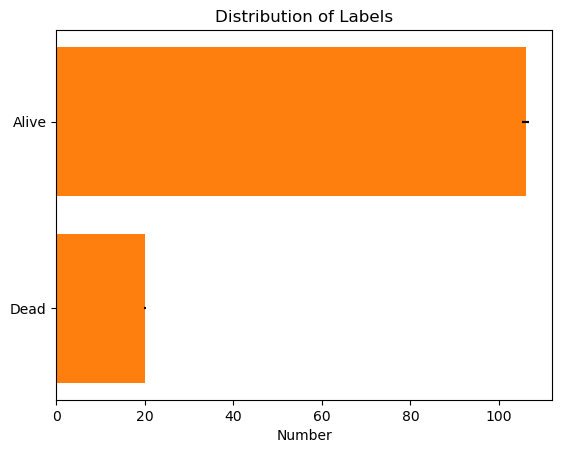

0    106
1     20
Name: label, dtype: int64


In [6]:
fig, ax = plt.subplots()
classes = ('Alive', 'Dead')
y_pos = np.arange(len(classes))
dist = Data.label.value_counts(sort=False)
error = np.random.rand(len(classes))

ax.barh(y_pos, dist, xerr=error, align='center')
ax.barh(y_pos, dist, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(classes)
ax.invert_yaxis()
ax.set_xlabel('Number')
ax.set_title('Distribution of Labels')
plt.show()
print(dist)

In [7]:
drop_elements = ['Tag']
#New_Data = Data.drop(drop_elements, axis = 1)
New_Data = Data
New_Data.head()
New_Data.describe()

,Original_shape_Maximum3DDiameter,Original_shape_Maximum2DDiameterSlice,Original_shape_Sphericity,Original_shape_MinorAxis,Original_shape_Elongation,Original_shape_SurfaceVolumeRatio,Original_shape_Volume,Original_shape_MajorAxis,Original_shape_SurfaceArea,Original_shape_Flatness,...,Original_ glrlm_ RunEntropy,Original_ glrlm_ RunLengthNonUniformityNormalized,Original_ glszm_ LargeAreaEmphasis,Original_ glszm_ SmallAreaHighGrayLevelEmphasis,Original_ glszm_ ZonePercentage,Original_ glszm_ LargeAreaLowGrayLevelEmphasis,Original_ glszm_ LargeAreaHighGrayLevelEmphasis,Original_ glszm_ SmallAreaEmphasis,Original_ glszm_ SmallAreaLowGrayLevelEmphasis,label
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,...,126.000000,126.000000,1.260000e+02,1.260000e+02,126.000000,1.260000e+02,1.260000e+02,1.260000e+02,1.260000e+02,126.000000
mean,51.095010,43.001444,0.681786,31.239683,0.738478,0.278975,32862.730159,44.250961,6756.095909,0.600034,...,3.875533,0.099115,3.263245e+09,4.407997e-08,0.000089,3.263245e+09,3.263245e+09,4.407997e-08,4.407997e-08,0.158730
std,22.089780,17.833979,0.071058,12.625682,0.148996,0.068209,47236.623897,20.394661,6441.374303,0.126484,...,0.444599,0.020421,1.124826e+10,2.559415e-07,0.000129,1.124826e+10,1.124826e+10,2.559415e-07,2.559415e-07,0.366883
min,25.670995,21.587033,0.423301,16.291690,0.211417,0.111056,3968.000000,20.764962,1642.118722,0.181517,...,2.765922,0.054080,5.241760e+05,1.105150e-11,0.000003,5.241760e+05,5.241760e+05,1.105150e-11,1.105150e-11,0.000000
25%,34.161232,29.965764,0.643400,22.371935,0.641953,0.234158,8850.000000,29.932499,2882.677232,0.532134,...,3.550124,0.085160,7.247738e+07,1.030799e-09,0.000032,7.247738e+07,7.247738e+07,1.030799e-09,1.030799e-09,0.000000
50%,43.576647,37.228866,0.704051,27.412008,0.763573,0.293265,14756.000000,37.155712,4179.533847,0.609437,...,3.810279,0.099055,2.047995e+08,5.189234e-09,0.000070,2.047995e+08,2.047995e+08,5.189234e-09,5.189234e-09,0.000000
75%,60.981440,50.774009,0.728135,36.375215,0.859336,0.333366,31700.000000,51.989844,7666.241052,0.681103,...,4.130273,0.113786,9.778132e+08,1.505521e-08,0.000118,9.778132e+08,9.778132e+08,1.505521e-08,1.505521e-08,0.000000
max,134.234869,104.048066,0.913747,74.245548,0.957673,0.413840,300808.000000,120.237208,39437.623404,0.899384,...,5.118473,0.164181,9.048545e+10,2.170362e-06,0.001381,9.048545e+10,9.048545e+10,2.170362e-06,2.170362e-06,1.000000


In [8]:
X_full=New_Data.drop(['label'], axis=1)
y_full=New_Data.label
X_full.head()

,Original_shape_Maximum3DDiameter,Original_shape_Maximum2DDiameterSlice,Original_shape_Sphericity,Original_shape_MinorAxis,Original_shape_Elongation,Original_shape_SurfaceVolumeRatio,Original_shape_Volume,Original_shape_MajorAxis,Original_shape_SurfaceArea,Original_shape_Flatness,...,Original_ glrlm_ LongRunLowGrayLevelEmphasis,Original_ glrlm_ RunEntropy,Original_ glrlm_ RunLengthNonUniformityNormalized,Original_ glszm_ LargeAreaEmphasis,Original_ glszm_ SmallAreaHighGrayLevelEmphasis,Original_ glszm_ ZonePercentage,Original_ glszm_ LargeAreaLowGrayLevelEmphasis,Original_ glszm_ LargeAreaHighGrayLevelEmphasis,Original_ glszm_ SmallAreaEmphasis,Original_ glszm_ SmallAreaLowGrayLevelEmphasis
0,38.405729,31.780497,0.706218,27.317468,0.862768,0.301396,11728,31.662598,3534.769336,0.621709,...,173.508976,3.733738,0.101223,137545984,7.270296e-09,0.000085,137545984,137545984,7.270296e-09,7.270296e-09
1,30.773365,24.041631,0.744777,19.119353,0.709130,0.359585,5888,26.961707,2117.238537,0.602312,...,118.884437,3.358636,0.124411,34668544,2.884459e-08,0.000170,34668544,34668544,2.884459e-08,2.884459e-08
2,37.669616,35.693137,0.716435,18.419165,0.573703,0.350216,7160,32.105745,2507.546950,0.531577,...,134.252201,3.405191,0.122935,51265600,1.950626e-08,0.000140,51265600,51265600,1.950626e-08,1.950626e-08
3,43.943145,37.336309,0.734781,31.644127,0.870067,0.237176,21368,36.369748,5067.983801,0.732578,...,269.943696,3.971467,0.091686,456591424,2.190142e-09,0.000047,456591424,456591424,2.190142e-09,2.190142e-09
4,83.922583,76.537572,0.609507,23.903279,0.211417,0.340609,12640,113.062431,4305.299669,0.181517,...,129.059366,3.591772,0.109483,46132544,4.049504e-08,0.000158,46132544,46132544,4.049504e-08,4.049504e-08


###Data Normalization --> MinMaxScaling Metric

In [9]:
scaler=MinMaxScaler()

X_full=scaler.fit_transform(X_full)

print(X_full)

[[1.17301760e-01 1.23615527e-01 5.76857435e-01 ... 1.51430531e-03
  3.34473292e-03 3.34473292e-03]
 [4.69987818e-02 2.97667557e-02 6.55476884e-01 ... 3.77348676e-04
  1.32851970e-02 1.32851970e-02]
 [1.10521306e-01 1.71063871e-01 5.97689668e-01 ... 5.60772106e-04
  8.98251309e-03 8.98251309e-03]
 ...
 [1.78247338e-01 2.36749114e-01 5.54411803e-01 ... 5.88530682e-03
  8.59273419e-04 8.59273419e-04]
 [2.25478141e-01 2.29618347e-01 4.61231801e-01 ... 9.12012124e-03
  5.52886380e-04 5.52886380e-04]
 [1.73307721e-01 1.19008985e-01 5.04196275e-01 ... 1.72654415e-03
  2.93432611e-03 2.93432611e-03]]


###Bootstrap sampling

In [11]:
from sklearn.utils import resample

values = New_Data.values
n_iterations = 10
n_size = int(len(New_Data) * 0.50)
stats = list()

for i in range(n_iterations):
    #train & test sets
    train = resample(values, n_samples = n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])

X_train_Boot, y_train_Boot = train[:,:-1], train[:,-1]
X_test_Boot, y_test_Boot = test[:,:-1], test[:,-1]

In [16]:
X_train_Boot

array([[8.72868833e+01, 5.96154342e+01, 6.81066652e-01, ...,
        1.33485673e+10, 7.49144068e-11, 7.49144068e-11],
       [4.44859528e+01, 3.14006369e+01, 6.70582070e-01, ...,
        1.56750400e+08, 6.37956905e-09, 6.37956905e-09],
       [3.41027858e+01, 2.65706605e+01, 7.17591027e-01, ...,
        7.09637760e+07, 1.40916966e-08, 1.40916966e-08],
       ...,
       [4.67653718e+01, 3.46698716e+01, 7.01883201e-01, ...,
        3.90773824e+08, 2.55902504e-09, 2.55902504e-09],
       [6.21208500e+01, 4.51884941e+01, 7.10566058e-01, ...,
        3.05676294e+09, 3.27143458e-10, 3.27143458e-10],
       [5.95566957e+01, 4.75184175e+01, 5.47336984e-01, ...,
        7.17382656e+08, 1.39395620e-09, 1.39395620e-09]])

In [17]:
y_train_Boot

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

###Data Split by using Holdout Method

In [12]:
# X_full=New_Data.drop(['label'], axis=1)
y_full=New_Data.label
# print(X_full.head())

# Data Split by using Holdout Method
X_training, X_testing , y_training , y_testing = train_test_split(X_full,y_full ,test_size=0.2,random_state=random_state)
print('X Training: ',X_training.shape)
print('Y Training: ',y_training.shape)
print('X Test: ',X_testing.shape)
print('Y Test: ',y_testing.shape)

# Turn the values into an array
y_training = y_training.ravel()
y_testing = y_testing.ravel()
# x_training = X_training.values
# x_testing = X_testing.values
print(type(X_training))

X Training:  (100, 59)
Y Training:  (100,)
X Test:  (26, 59)
Y Test:  (26,)
<class 'numpy.ndarray'>


##Boruta

In [12]:
!pip install Boruta

In [15]:
from boruta import BorutaPy

In [13]:
X_train = pd.DataFrame(X_training)
y_train = pd.DataFrame(y_training)
X_test = pd.DataFrame(X_testing)
y_test = pd.DataFrame(y_testing)

In [16]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	59
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	51
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	51
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	51
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	51
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	51
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	51
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	51
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	51
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	51
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=74,
                                          random_state=RandomState(MT19937) at 0x28E01B39E40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x28E01B39E40, verbose=2)

In [16]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [17 46 25 44 33 18 53 31 35 12 50 40 24 16 49 51 14 27 28 19 43 29 22 36
  1 10  6  9  2  2  8  5  2  3 13  7  3 11  5  1 38 27 54 33 42 40 30 15
 20 21 46 24 49 47 52 55 41 38 35]
No. of significant features:  2


In [17]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                       'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
24,24,1
39,39,1
28,28,2
32,32,2
29,29,2
36,36,3
33,33,3
38,38,5
31,31,5
26,26,6


In [18]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test)) 

In [19]:
rf_boruta = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf_boruta.fit(X_important_train, y_train) 

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [20]:
accuracy_score(y_test, rf_boruta.predict(X_important_test))

0.8076923076923077

##Anova (analysis of variance)

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import set_config

set_config(display="diagram")

In [21]:
nof_list=np.arange(1,21)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    fs = SelectKBest(f_classif, k=nof_list[n])
    relief = Pipeline([('fs', fs), ('m', AdaBoostClassifier())])
    # relief = Pipeline([('fs', fs), ('m', BaggingClassifier())])
    # relief = Pipeline([('fs', fs), ('m', BernoulliNB())])
    # relief = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
    # relief = Pipeline([('fs', fs), ('m', ExtraTreesClassifier())])
    # relief = Pipeline([('fs', fs), ('m', GaussianNB())])
    # relief = Pipeline([('fs', fs), ('m', GradientBoostingClassifier())])
    # relief = Pipeline([('fs', fs), ('m', HistGradientBoostingClassifier())])
    # relief = Pipeline([('fs', fs), ('m', KNeighborsClassifier())])
    # relief = Pipeline([('fs', fs), ('m', LinearDiscriminantAnalysis())])
    # relief = Pipeline([('fs', fs), ('m', LogisticRegression())])
    # relief = Pipeline([('fs', fs), ('m', MLPClassifier())])
    # relief = Pipeline([('fs', fs), ('m', NearestCentroid())])
    # relief = Pipeline([('fs', fs), ('m', PassiveAggressiveClassifier())])
    # relief = Pipeline([('fs', fs), ('m', QuadraticDiscriminantAnalysis())])
    relief = Pipeline([('fs', fs), ('m', RandomForestClassifier())])
    # relief = Pipeline([('fs', fs), ('m', RidgeClassifier())])
    # relief = Pipeline([('fs', fs), ('m', SVC(kernel='linear'))])
    # relief = Pipeline([('fs', fs), ('m', SVC(kernel='poly'))])
    # relief = Pipeline([('fs', fs), ('m', SVC(kernel='rbf'))])
    # relief = Pipeline([('fs', fs), ('m', SVC(kernel='sigmoid'))])
    relief.fit(X_training,y_training)
    score = relief.score(X_testing,y_testing)
    score_list.append(score)
    print(f'NOF: {nof_list[n]}, Score: {score}')
    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print (print(f'High Score: NOF: {nof}, Score: {high_score}'))

NOF: 1, Score: 0.7692307692307693
NOF: 2, Score: 0.8076923076923077
NOF: 3, Score: 0.8461538461538461
NOF: 4, Score: 0.8461538461538461
NOF: 5, Score: 0.8461538461538461
NOF: 6, Score: 0.8461538461538461
NOF: 7, Score: 0.8461538461538461
NOF: 8, Score: 0.8461538461538461
NOF: 9, Score: 0.8846153846153846
NOF: 10, Score: 0.8846153846153846
NOF: 11, Score: 0.8076923076923077
NOF: 12, Score: 0.8076923076923077
NOF: 13, Score: 0.8461538461538461
NOF: 14, Score: 0.8846153846153846
NOF: 15, Score: 0.8846153846153846
NOF: 16, Score: 0.8461538461538461
NOF: 17, Score: 0.8076923076923077
NOF: 18, Score: 0.8461538461538461
NOF: 19, Score: 0.8461538461538461
NOF: 20, Score: 0.8846153846153846
High Score: NOF: 9, Score: 0.8846153846153846
None


In [23]:
anova

NameError: name 'anova' is not defined

##Relief

In [24]:
!pip install sklearn_relief

In [25]:
import sklearn_relief as sr

In [26]:
nof_list=np.arange(1, 20)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    fs = sr.RReliefF(n_features = nof_list[n])
    # relief = Pipeline([('fs', fs), ('m', AdaBoostClassifier())])
    # relief = Pipeline([('fs', fs), ('m', BaggingClassifier())])
    # relief = Pipeline([('fs', fs), ('m', BernoulliNB())])
    # relief = Pipeline([('fs', fs), ('m', DecisionTreeClassifier())])
    # relief = Pipeline([('fs', fs), ('m', ExtraTreesClassifier())])
    # relief = Pipeline([('fs', fs), ('m', GaussianNB())])
    # relief = Pipeline([('fs', fs), ('m', GradientBoostingClassifier())])
    # relief = Pipeline([('fs', fs), ('m', HistGradientBoostingClassifier())])
    # relief = Pipeline([('fs', fs), ('m', KNeighborsClassifier())])
    # relief = Pipeline([('fs', fs), ('m', LinearDiscriminantAnalysis())])
    # relief = Pipeline([('fs', fs), ('m', LogisticRegression())])
    # relief = Pipeline([('fs', fs), ('m', MLPClassifier())])
    # relief = Pipeline([('fs', fs), ('m', NearestCentroid())])
    # relief = Pipeline([('fs', fs), ('m', PassiveAggressiveClassifier())])
    # relief = Pipeline([('fs', fs), ('m', QuadraticDiscriminantAnalysis())])
    relief = Pipeline([('fs', fs), ('m', RandomForestClassifier())])
    # relief = Pipeline([('fs', fs), ('m', RidgeClassifier())])
    # relief = Pipeline([('fs', fs), ('m', SVC(kernel='linear'))])
    # relief = Pipeline([('fs', fs), ('m', SVC(kernel='poly'))])
    # relief = Pipeline([('fs', fs), ('m', SVC(kernel='rbf'))])
    # relief = Pipeline([('fs', fs), ('m', SVC(kernel='sigmoid'))])
    relief.fit(X_training,y_training)
    score = relief.score(X_testing,y_testing)
    score_list.append(score)
    print(f'NOF: {nof_list[n]}, Score: {score}')
    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print (print(f'High Score: NOF: {nof}, Score: {high_score}'))

NOF: 1, Score: 0.8076923076923077
NOF: 2, Score: 0.7307692307692307
NOF: 3, Score: 0.7307692307692307
NOF: 4, Score: 0.8461538461538461
NOF: 5, Score: 0.8461538461538461
NOF: 6, Score: 0.8846153846153846
NOF: 7, Score: 0.8461538461538461
NOF: 8, Score: 0.7307692307692307
NOF: 9, Score: 0.8461538461538461
NOF: 10, Score: 0.8846153846153846
NOF: 11, Score: 0.7692307692307693
NOF: 12, Score: 0.7692307692307693
NOF: 13, Score: 0.8461538461538461
NOF: 14, Score: 0.8461538461538461
NOF: 15, Score: 0.8461538461538461
NOF: 16, Score: 0.7692307692307693
NOF: 17, Score: 0.8846153846153846
NOF: 18, Score: 0.8461538461538461
NOF: 19, Score: 0.7307692307692307
High Score: NOF: 6, Score: 0.8846153846153846
None


In [ ]:
score_list_df = pd.DataFrame(score_list)
score_list_df.to_csv('results.csv')

##Recursive Feature Elimination (RFE)

In [17]:
from sklearn.feature_selection import RFE

In [18]:
nof_list=np.arange(1,20)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    # fs = RFE(AdaBoostClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(BaggingClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(BernoulliNB(),n_features_to_select = nof_list[n])
    # fs = RFE(DecisionTreeClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(ExtraTreesClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(GaussianNB(),n_features_to_select = nof_list[n])
    # fs = RFE(GradientBoostingClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(HistGradientBoostingClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(KNeighborsClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(LinearDiscriminantAnalysis(),n_features_to_select = nof_list[n])
    # fs = RFE(LogisticRegression(),n_features_to_select = nof_list[n])
    # fs = RFE(MLPClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(NearestCentroid(),n_features_to_select = nof_list[n])
    # fs = RFE(PassiveAggressiveClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(QuadraticDiscriminantAnalysis(),n_features_to_select = nof_list[n])
    fs = RFE(RandomForestClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(RidgeClassifier(),n_features_to_select = nof_list[n])
    # fs = RFE(SVC(kernel='linear')(),n_features_to_select = nof_list[n])
    # fs = RFE(SVC(kernel='poly')(),n_features_to_select = nof_list[n])
    # fs = RFE(SVC(kernel='rbf')(),n_features_to_select = nof_list[n])
    # fs = RFE(SVC(kernel='sigmoid')(),n_features_to_select = nof_list[n])

    rfe = Pipeline([('fs', fs)])

    rfe.fit(X_training,y_training)
    score = rfe.score(X_testing,y_testing)
    score_list.append(score)
    print(f'NOF: {nof_list[n]}, Score: {score}')
    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print (print(f'High Score: NOF: {nof}, Score: {high_score}'))

NOF: 1, Score: 0.8076923076923077
NOF: 2, Score: 0.8846153846153846
NOF: 3, Score: 0.8076923076923077
NOF: 4, Score: 0.8076923076923077
NOF: 5, Score: 0.8461538461538461
NOF: 6, Score: 0.8076923076923077
NOF: 7, Score: 0.8846153846153846
NOF: 8, Score: 0.8846153846153846
NOF: 9, Score: 0.8846153846153846
NOF: 10, Score: 0.8846153846153846
NOF: 11, Score: 0.8461538461538461
NOF: 12, Score: 0.8846153846153846
NOF: 13, Score: 0.8846153846153846
NOF: 14, Score: 0.8846153846153846
NOF: 15, Score: 0.8846153846153846
NOF: 16, Score: 0.8846153846153846
NOF: 17, Score: 0.8461538461538461
NOF: 18, Score: 0.8461538461538461
NOF: 19, Score: 0.8461538461538461
High Score: NOF: 2, Score: 0.8846153846153846
None


## mRMR (Maximum Relevance — Minimum Redundancy)

In [1]:
!pip install git+https://github.com/smazzanti/mrmr

  Cloning https://github.com/smazzanti/mrmr to c:\users\elahe\appdata\local\temp\pip-req-build-24w78kc6


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Elahe\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Elahe\\AppData\\Local\\Temp\\pip-req-build-24w78kc6\\setup.py'"'"'; __file__='"'"'C:\\Users\\Elahe\\AppData\\Local\\Temp\\pip-req-build-24w78kc6\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Elahe\AppData\Local\Temp\pip-pip-egg-info-5uvj27yv'
         cwd: C:\Users\Elahe\AppData\Local\Temp\pip-req-build-24w78kc6\
    Complete output (9 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\Elahe\AppData\Local\Temp\pip-req-build-24w78kc6\setup.py", line 2, in <module>
        from mrmr import __version__
      File "C:\Users\Elahe\AppData\Local\Temp\pip-req-build-24w78kc6\mrmr\__init__.py", line 2, in <modu

In [3]:
from mrmr import mrmr_classif

In [6]:
X = pd.read_csv('/content/Manual - Copy.csv', header=None)
X.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Manual - Copy.csv'

In [ ]:
# MinMaxScaling Metric
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
print(X)

y=New_Data.label

In [ ]:
X_f = pd.DataFrame(X)
y_f = pd.Series(y)
selected_features = mrmr_classif(X_f, y_f, K = 10)

In [ ]:
selected_features

In [ ]:
arr = np.array(selected_features)
print(arr)